In [1]:
!pip install simpleitk
!pip install numpy
!pip install pynrrd
!pip install opencv-python

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
import os as os
import nrrd as reader
import tensorflow as tf
#from sklearn.preprocessing import Normalizer
import cv2  
from skimage import morphology
from skimage.measure import label
from skimage.segmentation import active_contour
from skimage import data, io, img_as_ubyte,filters

j = 5

# Image Import

In [3]:
def join(one, two):
    return os.path.join(one, two)

In [4]:
def check_path(path):
    count=0
    for files in sorted(os.listdir(path)):
        image_path = os.path.join(path,files)
        count+=1
    return count

In [5]:
# (patient count* 15) check_path function will return total patient count 
folder_path = join(os.getcwd(), "Incoming Annotations")
length = check_path(folder_path)
inputs = np.zeros((length*15,256,256, 1))
outputs = np.zeros((length*15,256,256 , 9))

In [6]:
# #functions for inhomogeneity correction 
def correct_roi(image):
    inputImage=sitk.GetImageFromArray(image)
    inputImage = sitk.Cast(inputImage, sitk.sitkFloat32 )
    corrector = sitk.N4BiasFieldCorrectionImageFilter()
    output = corrector.Execute( inputImage)
    image_c= sitk.GetArrayFromImage(output)
    image_c=cv2.normalize(src=image_c, dst=None, alpha=0.0, beta=255.0, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U) #need to normalize, not direct conversion by "np.uint8"
    return image_c

In [7]:
def dcm_to_np(path):
    global dic_count
    try:
        slice_filenames = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(path)
        image = sitk.ReadImage(slice_filenames)
        for x in range(15):
            current_slice = image[:, :, x] #************************
            current_array = sitk.GetArrayFromImage(current_slice)
           # Ivol=sitk.GetArrayFromImage(inputs[:, :, :])
            split_array = current_array[:,:-256]
            inputs[dic_count] = split_array[:, :, np.newaxis]
            dic_count+=1
        print(dic_count)
    except Exception as e:
        print(e)
#         print("Problem with this folder -> " + path)

In [8]:
def nrrd_to_np(meta_object):
    global ann_count
    try:
        data = sitk.GetArrayFromImage(meta_object)
        for p in range(15):
            current_seg = data[p, :, :]
            half_seg= current_seg[:,:-256]
            black = np.zeros([256, 256, 9])
            for y, a in enumerate(half_seg):
                for x, b in enumerate(a):
                    if b>0:
                        black[y][x][b-1] = 1
            outputs[ann_count] = black
            ann_count+=1
        print(ann_count)
    except Exception as e:
        print(e)

In [9]:
dic_count = 0
ann_count = 0
try:
    for patient in sorted(os.listdir(folder_path)):
            patient_path = join(folder_path, patient)
            nrrd_folder = join(patient_path, "NRRD")
            dcm_to_np(patient_path)
            for nrrd in os.listdir(nrrd_folder):
                if(".nrrd" in nrrd):
                    segmentation = sitk.ReadImage(join(nrrd_folder, nrrd))
                    nrrd_to_np(segmentation)
                    if(".DS_Store" in nrrd):
                        pass
except Exception as e:
    print(e)


15
15
30
30
45
45
60
60
75
75
90
90
105
105
120
120
135
135
150
150
165
165
180
180
195
195
210
210
225
225
240
240
255
255
270
270
285
285
300
300
315
315
330
330
345
345
360
360
375
375
390
390
405
405
420
420
435
435
450
450
465
465
480
480
495
495
510
510
525
525
540
540
555
555
570
570
585
585
600
600
615
615
630
630
645
645
660
660
675
675
690
690
705
705
720
720
735
735
750
750
765
765
780
780
795
795
810
810
825
825
840
840
855
855
870
870
885
885
900
900
915
915
930
930
945
945
960
960
975
975
990
990
1005
1005
1020
1020
1035
1035
1050
1050
1065
1065
1080
1080
1095
1095
1110
1110
1125
1125
1140
1140
1155
1155
1170
1170
1185
1185
1200
1200
1215
1215
1230
1230
1245
1245
1260
1260
1275
1275
1290
1290
1305
1305
1320
1320
1335
1335
1350
1350
1365
1365
1380
1380
1395
1395
1410
1410
1425
1425
1440
1440
1455
1455
1470
1470
1485
1485
1500
1500
1515
1515
1530
1530
1545
1545
1560
1560
1575
1575
1590
1590
1605
1605
1620
1620
1635
1635
1650
1650
1665
1665
1680
1680
1695
1695
1710
1710
1725

In [10]:
#opencv + numpy normalization 
for x in range (j):    
    temp = inputs[x].reshape(256, 256)
    temp1= correct_roi(temp)
    np.linalg.norm(temp1)
    inputs[x]=temp1[:, :, np.newaxis]
    print(x)

0
1
2
3
4


In [11]:
temp = inputs[1].reshape(256,256)
temp.max()


255.0

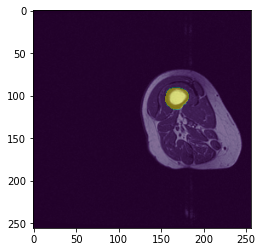

In [12]:
for i in range(1):
    plt.imshow(inputs[i].reshape(256, 256), cmap=plt.cm.bone)
    plt.imshow(outputs[i][:, :, 2], alpha=0.5)
    plt.show()

In [17]:
#Merging all 9 channels of masks into 1 channel
merged_array = np.zeros((1755, 256, 256, 1))
for x in range (j):
    for i in range (9):
        if i !=2:
            merged_array[x,:,:,0]+=outputs[x,:,:, i]
            
merged_array1=merged_array[:, :, :, 0]
inputs1=inputs[:, :, :, 0]


In [18]:
invarray = np.zeros((1755, 256, 256, 1))
for x in range (j):
    for i in range (9):
        invarray[x,:,:,0]+=outputs[x,:,:,i]
        
invpreroi=invarray[:, :, :, 0]

# Image Processing

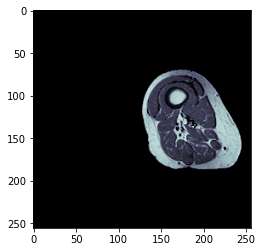

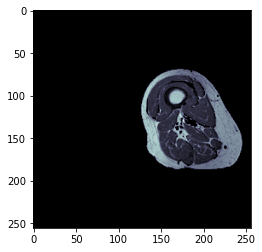

In [35]:
imageI=inputs[:, :, :, 0] #Inputs Variable 
ArrayI = np.zeros((1755, 256, 256, 1)) 
for x in range (1755): 
    for i in range (9):
        ArrayI[x,:,:,0]+=outputs[x,:,:,i] #Merged MSK Mask
ArrayII=ArrayI[:, :, :, 0] # Get rid of [:,:,:,1]
INVArrayI=1-ArrayII #Invered Mask
INVArrayII=INVArrayI*imageI #Mask multipled with array
INVArrayIII=np.where(INVArrayII > 80, 1 , 0) #Get rid of magnetic background noise
ArrayIII = INVArrayIII+ArrayII #Add both the merged msk and inv msk together
FINALArray=ArrayIII*inputs1 #Multiply new mask with original image
for i in range (2):
    plt.imshow(FINALArray[i],cmap=plt.cm.bone,vmin=0,vmax=255)
    plt.show()

In [21]:
##Initial Threshold Seeking via Multi OTSU
def multi_otsu(image):
    motsuth=filters.threshold_multiotsu(image, classes=3)
    print(motsuth)
    print (f"Slice {i+1} otsu threshold={motsuth[1]}")
    regions=np.digitize(image,bins=motsuth)
    output=img_as_ubyte(regions)
    fig, ax=plt.subplots (1,4, figsize=(10,5))
    ax[0].imshow(image, cmap="bone")
    ax[0].set_title(f"Slice {i+1} Original")
    ax[0].axis("off")
    ax[1].hist(image.ravel(),256,[20,256])
    #ax[1].hist(image.ravel(),bins=255)
    for th in motsuth:
            ax[1].axvline(th,color="r")
    ax[2].imshow(regions,cmap="Accent")
    ax[2].set_title("Multi-Otsu Result")
    ax[2].axis ("off")
    ax[3].imshow(image>motsuth[1],cmap="bone")
    ax[3].set_title("Threshold Applied")
    ax[3].axis ("off")
    return motsuth[1] #(fat+ muscle th)

# # ITSA Implementation (Merged Mask)

[ 37.35351562 126.00585938]
Slice 1 otsu threshold=126.005859375


/Users/jasontsang/opt/anaconda3/lib/python3.8/site-packages/skimage/util/dtype.py:525: UserWarning: Downcasting int64 to uint8 without scaling because max value 2 fits in uint8
  return _convert(image, np.uint8, force_copy)


[ 28.38867188 101.10351562]
Slice 2 otsu threshold=101.103515625
[ 32.37304688 114.05273438]
Slice 3 otsu threshold=114.052734375
[ 34.36523438 124.01367188]
Slice 4 otsu threshold=124.013671875
[ 34.36523438 125.00976562]
Slice 5 otsu threshold=125.009765625


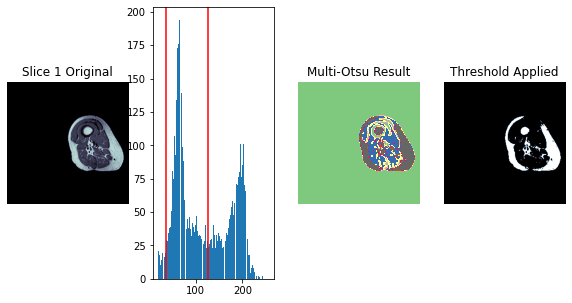

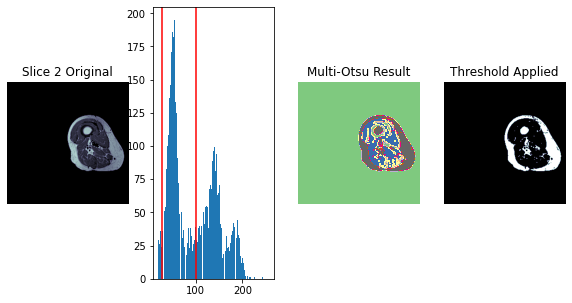

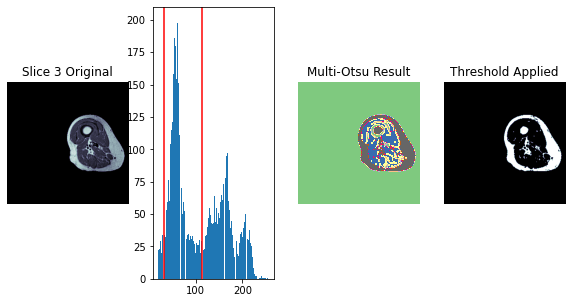

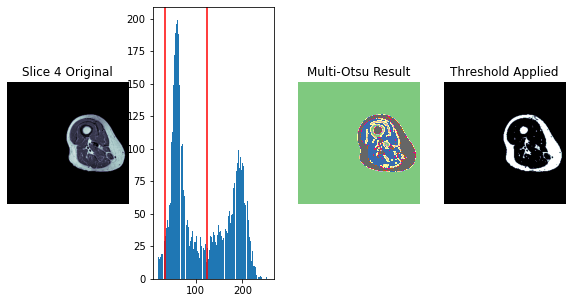

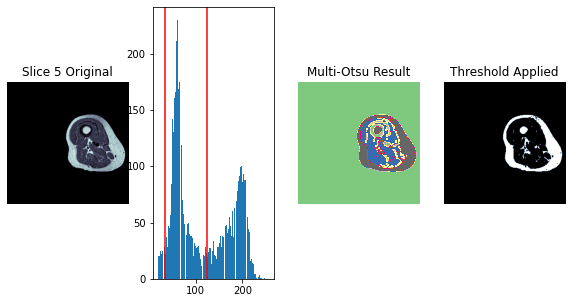

In [22]:
iThreshold=[]
for i in range(j):
    iThreshold.append([])
    iThreshold[i]=multi_otsu(FINALArray[i])

In [23]:
def ITSA(i, roivar, ots, zcheck):
    k=1
    ThPrev=0 
    ThRev= ots[i] 
    x=0
    y=0
    while ThRev!=ThPrev:
        ThPrev=ThRev
        prefatmask = (FINALArray[i]>ThRev)
        prefatmask = np.uint8(prefatmask)
        ret, fatmask = cv2.threshold(prefatmask,0,1,cv2.THRESH_BINARY)  #need this??
        if i==0:
            fatcombined_next=zcheck[i+1]+fatmask
            ret, fatconnectedparts_next= cv2.threshold(fatcombined_next,1,1,cv2.THRESH_BINARY)
            z_connection=fatconnectedparts_next
        elif i==(j-1):
            fatcombined_prev=zcheck[i-1]+fatmask
            ret, fatconnectedparts_prev= cv2.threshold(fatcombined_prev,1,1,cv2.THRESH_BINARY)
            z_connection=fatconnectedparts_prev  
        else:
            fatcombined_prev=zcheck[i-1]+fatmask
            fatcombined_next=fatmask+zcheck[i+1]
            ret, fatconnectedparts_prev= cv2.threshold(fatcombined_prev,1,1,cv2.THRESH_BINARY)
            ret, fatconnectedparts_next= cv2.threshold(fatcombined_next,1,1,cv2.THRESH_BINARY)

            z_connection=fatconnectedparts_prev+fatconnectedparts_next
            ret, z_connection= cv2.threshold(z_connection,0,1,cv2.THRESH_BINARY)         
        #NEW: find XY connections to Z connected parts
        coordinates= np.argwhere(z_connection ==1) #put coordinates of Z-connections into a list      
        im_ff=fatmask.copy()
        h, w = im_ff.shape[:2] #added
        mask = np.zeros((h+2, w+2), np.uint8)
        for item in range(len(coordinates)):
            cv2.floodFill(im_ff, mask, (coordinates[item][1],coordinates[item][0]), 2) 
        #Remove small islands for Non-Z parts
        nonZ =label(im_ff==1)
        nonZ_keep = (morphology.remove_small_objects(nonZ,min_size=8, connectivity=1))
        ret, nonZ_keep= cv2.threshold(np.uint8(nonZ_keep),0,1,cv2.THRESH_BINARY)
        Z = (im_ff==2)
        prefatseg1=(Z+nonZ_keep) #do we need int cus boolean??
        fatseg1=prefatseg1*FINALArray[i]
        #Fat and Muscle Quantification
        preMuscSegP=FINALArray[i]-fatseg1
        MuscSegP=np.ma.masked_where(preMuscSegP == 0, preMuscSegP)
        FatSegP=np.ma.masked_where(fatseg1==0,fatseg1) 
        MuscSegI=np.mean(MuscSegP)
        FatSegI=np.mean(FatSegP)
        ThRev=(1+((FatSegI-MuscSegI)/FatSegI))*MuscSegI
        print (f"Slice #{i+1} Iteration={k}\n\tThPrev={ThPrev}\n\tThRev={ThRev}\n")

        k+=1
        if k==50:
            break

    thresholds=ThRev
    return prefatseg1, fatseg1, thresholds

In [24]:
#Original + Original Revised
#Th1 R2
fatseg1vol_mask=np.zeros([inputs1.shape[0], inputs1.shape[1], inputs1.shape[2]], dtype='uint8')
fatseg1vol=np.zeros([inputs1.shape[0], inputs1.shape[1], inputs1.shape[2]], dtype='uint8') #change name
threshold_R1=[] #change name compared to single slice?
for i in range(j):
    threshold_R1.append([])
    fatseg1vol_mask[i],fatseg1vol[i], threshold_R1[i]=ITSA(i,FINALArray,iThreshold,merged_array1)  #fatsegfinalvol_mask_R1=round 1 final fat mask with islands REMOVED
    print (f"Slice #{i+1} Th1 = {threshold_R1[i]}")
    print ("-----------------------------------------------------------")

for i in range(j):
    print (f"Slice #{i+1} Th1 OG/Rev={threshold_R1[i]}")

Slice #1 Iteration=1
	ThPrev=126.005859375
	ThRev=110.92780445036011

Slice #1 Iteration=2
	ThPrev=110.92780445036011
	ThRev=105.1773523640787

Slice #1 Iteration=3
	ThPrev=105.1773523640787
	ThRev=103.3554321507763

Slice #1 Iteration=4
	ThPrev=103.3554321507763
	ThRev=102.50393499210308

Slice #1 Iteration=5
	ThPrev=102.50393499210308
	ThRev=102.22897137969194

Slice #1 Iteration=6
	ThPrev=102.22897137969194
	ThRev=102.22897137969194

Slice #1 Th1 = 102.22897137969194
-----------------------------------------------------------
Slice #2 Iteration=1
	ThPrev=101.103515625
	ThRev=86.43052426943893

Slice #2 Iteration=2
	ThPrev=86.43052426943893
	ThRev=81.43325765838883

Slice #2 Iteration=3
	ThPrev=81.43325765838883
	ThRev=79.98304277276881

Slice #2 Iteration=4
	ThPrev=79.98304277276881
	ThRev=79.52525432680099

Slice #2 Iteration=5
	ThPrev=79.52525432680099
	ThRev=79.52525432680099

Slice #2 Th1 = 79.52525432680099
-----------------------------------------------------------
Slice #3 It

<ipython-input-23-bae7a3217463>:37: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  nonZ_keep = (morphology.remove_small_objects(nonZ,min_size=8, connectivity=1))


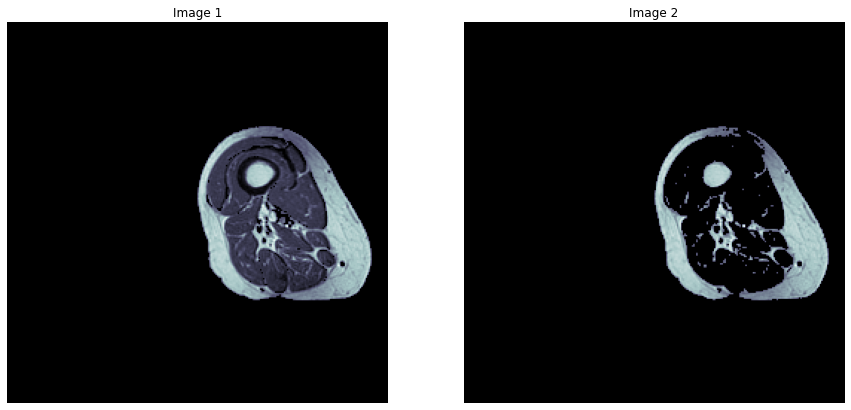

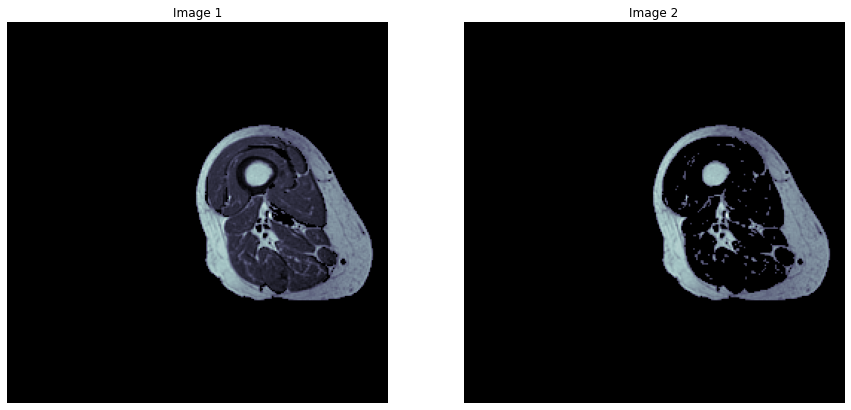

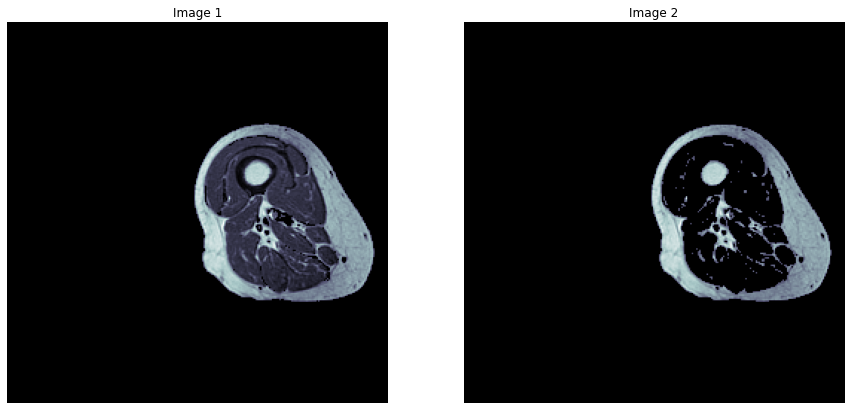

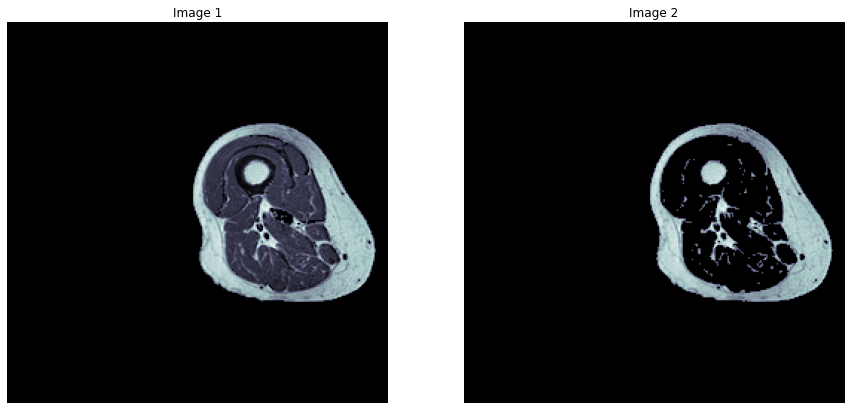

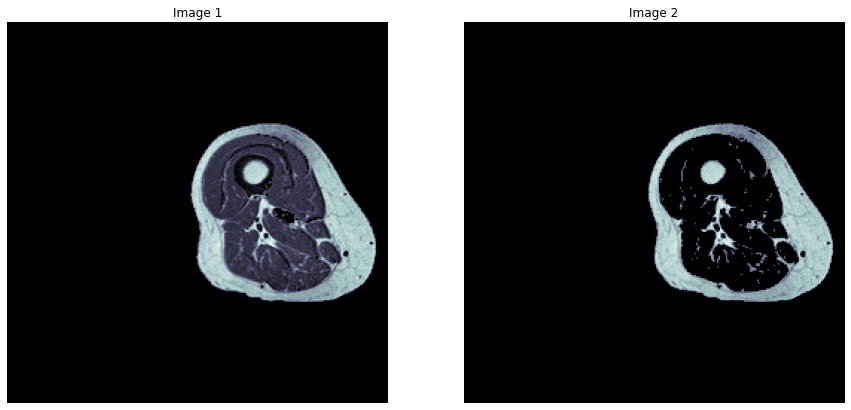

In [25]:
for i in range (j):
    fig, axs=plt.subplots (1,2, figsize=(15,10))
    axs[0].imshow(FINALArray[i],"bone",vmin=0,vmax=255)
    axs[0].set_title(f"Image 1")
    axs[0].axis("off")
    axs[1].imshow(fatseg1vol[i],"bone",vmin=0,vmax=255)
    axs[1].set_title(f"Image 2")
    axs[1].axis("off")


# Threshold Optimization Round 2

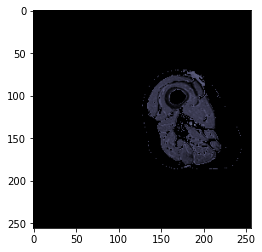

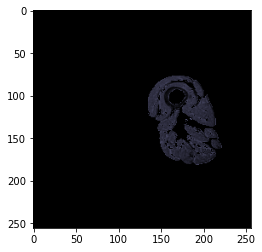

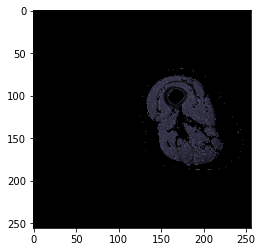

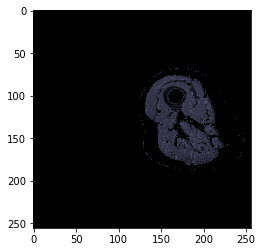

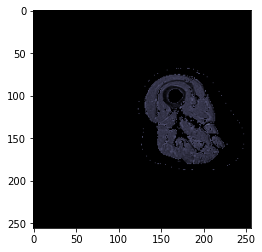

In [36]:
#Remove the first round of fat
FINALArrayR2=FINALArray-fatseg1vol
for i in range(j):  

    plt.imshow(FINALArrayR2[i], cmap=plt.cm.bone,vmin=0,vmax=255)
    plt.show()

In [37]:
def ITSA_R2(i, roivar, ots, zcheck):
    k_R2=1
    ThPrev_R2=0 
    ThRev_R2= ots[i] 
    x_R2=0
    y_R2=0
    while ThRev_R2!=ThPrev_R2:
        ThPrev_R2=ThRev_R2
        prefatmask_R2 = (FINALArrayR2[i]>ThRev_R2)
        prefatmask_R2 = np.uint8(prefatmask_R2)
        ret_R2, fatmask_R2 = cv2.threshold(prefatmask_R2,0,1,cv2.THRESH_BINARY)  #need this??
        if i==0:
            fatcombined_next_R2=zcheck[i+1]+fatmask_R2
            ret_R2, fatconnectedparts_next_R2= cv2.threshold(fatcombined_next_R2,1,1,cv2.THRESH_BINARY)
            z_connection_R2=fatconnectedparts_next_R2
        elif i==(j-1):
            fatcombined_prev_R2=zcheck[i-1]+fatmask_R2
            ret_R2, fatconnectedparts_prev_R2= cv2.threshold(fatcombined_prev_R2,1,1,cv2.THRESH_BINARY)
            z_connection_R2=fatconnectedparts_prev_R2
        else:
            fatcombined_prev_R2=zcheck[i-1]+fatmask_R2
            fatcombined_next_R2=fatmask_R2+zcheck[i+1]
            ret_R2, fatconnectedparts_prev_R2= cv2.threshold(fatcombined_prev_R2,1,1,cv2.THRESH_BINARY)
            ret_R2, fatconnectedparts_next_R2= cv2.threshold(fatcombined_next_R2,1,1,cv2.THRESH_BINARY)

            z_connection_R2=fatconnectedparts_prev_R2+fatconnectedparts_next_R2
            ret_R2, z_connection_R2= cv2.threshold(z_connection_R2,0,1,cv2.THRESH_BINARY)         
        #NEW: find XY connections to Z connected parts
        coordinates_R2= np.argwhere(z_connection_R2 ==1) #put coordinates of Z-connections into a list      
        im_ff_R2=fatmask_R2.copy()
        h_R2, w_R2 = im_ff_R2.shape[:2] #added
        mask_R2 = np.zeros((h_R2+2, w_R2+2), np.uint8)
        for item in range(len(coordinates_R2)):
            cv2.floodFill(im_ff_R2, mask_R2, (coordinates_R2[item][1],coordinates_R2[item][0]), 2) 
        #Remove small islands for Non-Z parts
        nonZ_R2 =label(im_ff_R2==1)
        nonZ_keep_R2 = (morphology.remove_small_objects(nonZ_R2,min_size=8, connectivity=1))
        ret_R2, nonZ_keep_R2= cv2.threshold(np.uint8(nonZ_keep_R2),0,1,cv2.THRESH_BINARY)
        Z_R2 = (im_ff_R2==2)
        prefatseg1_R2=(Z_R2+nonZ_keep_R2) #do we need int cus boolean??
        fatseg1_R2=prefatseg1_R2*FINALArrayR2[i]
        #Fat and Muscle Quantification
        preMuscSegP_R2=FINALArrayR2[i]-fatseg1_R2
        MuscSegP_R2=np.ma.masked_where(preMuscSegP_R2 == 0, preMuscSegP_R2)
        FatSegP_R2=np.ma.masked_where(fatseg1_R2==0,fatseg1_R2) 
        MuscSegI_R2=np.mean(MuscSegP_R2)
        FatSegI_R2=np.mean(FatSegP_R2)
        ThRev_R2=(1+((FatSegI_R2-MuscSegI_R2)/FatSegI_R2))*MuscSegI_R2
        print (f"Slice #{i+1} Iteration={k_R2}\n\tThPrev={ThPrev_R2}\n\tThRev={ThRev_R2}\n")

        k_R2+=1
        if k_R2==50:
            break

    thresholds_R2=ThRev_R2
    return prefatseg1_R2, fatseg1_R2, thresholds_R2

[28.91601562 71.87695312]
Slice 1 otsu threshold=71.876953125
[19.85351562 49.11132812]
Slice 2 otsu threshold=49.111328125
[22.01171875 54.93359375]
Slice 3 otsu threshold=54.93359375
[25.83984375 62.97265625]
Slice 4 otsu threshold=62.97265625
[26.8828125 65.1484375]
Slice 5 otsu threshold=65.1484375


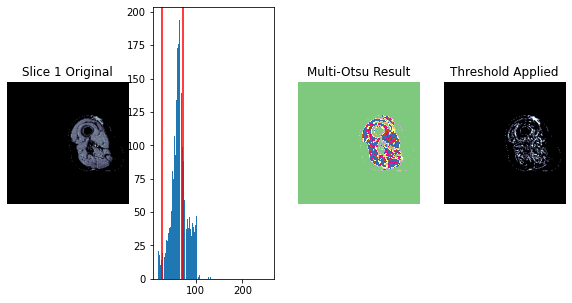

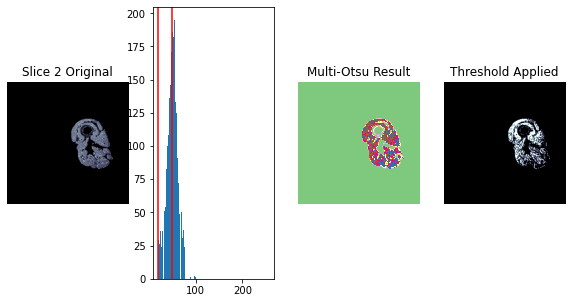

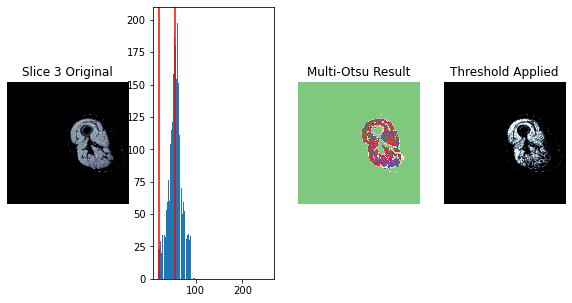

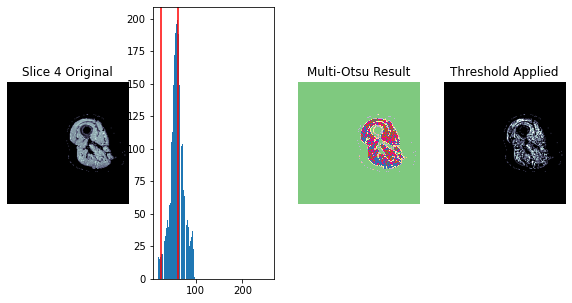

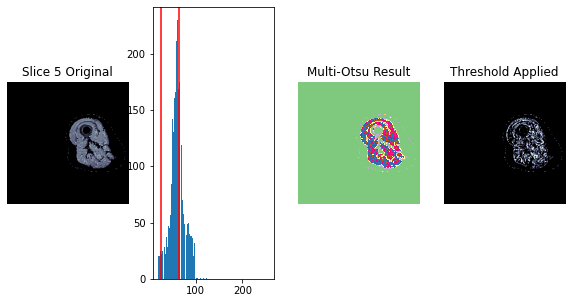

In [38]:
ithresholdR2=[]
for i in range(j):
  ithresholdR2.append([])
  ithresholdR2[i]=multi_otsu(FINALArrayR2[i])

In [39]:
fatseg1vol_maskR2=np.zeros([inputs1.shape[0], inputs1.shape[1], inputs1.shape[2]], dtype='uint8')
fatseg1volR2=np.zeros([inputs1.shape[0], inputs1.shape[1], inputs1.shape[2]], dtype='uint8') #change name

thresholds_R2=[] #change name compared to single slice?
for i in range(j):
    thresholds_R2.append([])
    fatseg1vol_maskR2[i],fatseg1volR2[i], thresholds_R2[i]=ITSA_R2(i,FINALArrayR2,ithresholdR2,merged_array1)  #fatsegfinalvol_mask_R1=round 1 final fat mask with islands REMOVED
    print (f"Slice #{i+1} Th1 R2= {ithresholdR2[i]}")
    print ("-----------------------------------------------------------")

for i in range(j):
    print (f"Slice #{i+1} Th1 R2 OG/Rev={ithresholdR2[i]}")

Slice #1 Iteration=1
	ThPrev=71.876953125
	ThRev=74.689788161026

Slice #1 Iteration=2
	ThPrev=74.689788161026
	ThRev=76.70371030790284

Slice #1 Iteration=3
	ThPrev=76.70371030790284
	ThRev=77.79860066365892

Slice #1 Iteration=4
	ThPrev=77.79860066365892
	ThRev=78.31254727477642

Slice #1 Iteration=5
	ThPrev=78.31254727477642
	ThRev=78.72703646486568

Slice #1 Iteration=6
	ThPrev=78.72703646486568
	ThRev=78.72703646486568

Slice #1 Th1 R2= 71.876953125
-----------------------------------------------------------
Slice #2 Iteration=1
	ThPrev=49.111328125
	ThRev=50.90114553299837

Slice #2 Iteration=2
	ThPrev=50.90114553299837
	ThRev=51.725611961357025

Slice #2 Iteration=3
	ThPrev=51.725611961357025
	ThRev=52.59387313367708

Slice #2 Iteration=4
	ThPrev=52.59387313367708
	ThRev=53.465756721800204

Slice #2 Iteration=5
	ThPrev=53.465756721800204
	ThRev=54.30160816055789

Slice #2 Iteration=6
	ThPrev=54.30160816055789
	ThRev=55.18703033888861

Slice #2 Iteration=7
	ThPrev=55.187030338888

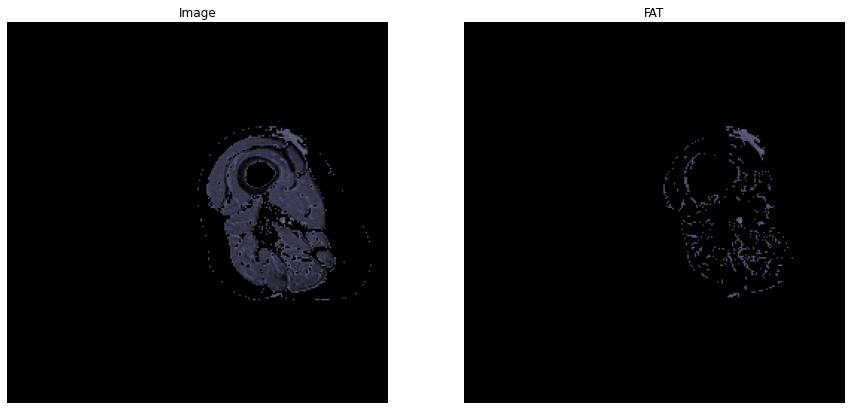

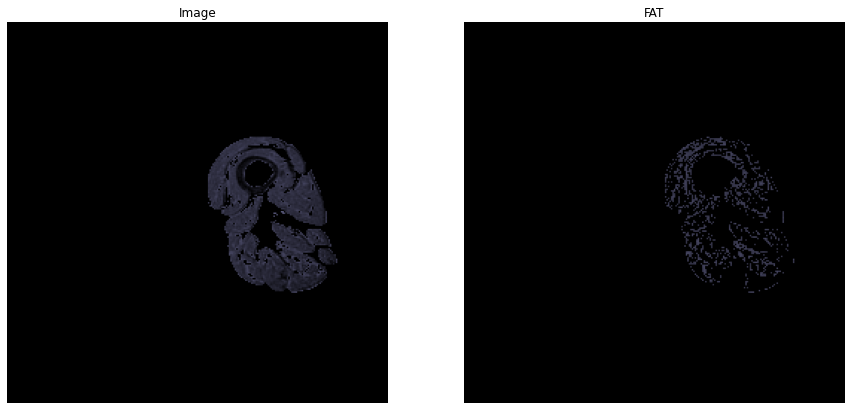

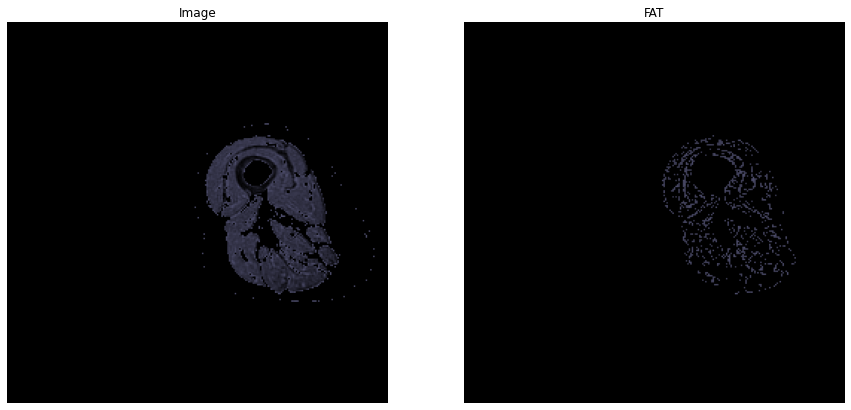

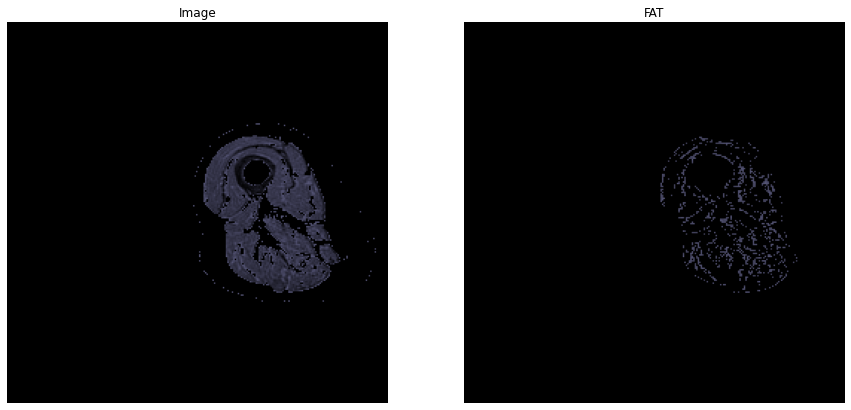

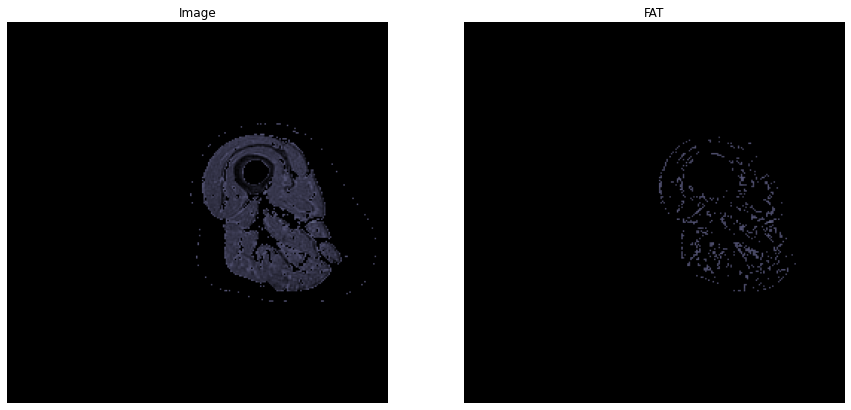

In [42]:
for i in range (j):
    fig, axs=plt.subplots (1,2, figsize=(15,10))
    axs[0].imshow(FINALArrayR2[i],"bone",vmin=0,vmax=255)
    axs[0].set_title(f"Image")
    axs[0].axis("off")
    axs[1].imshow(fatseg1volR2[i],"bone",vmin=0,vmax=255)
    axs[1].set_title(f"FAT")
    axs[1].axis("off")

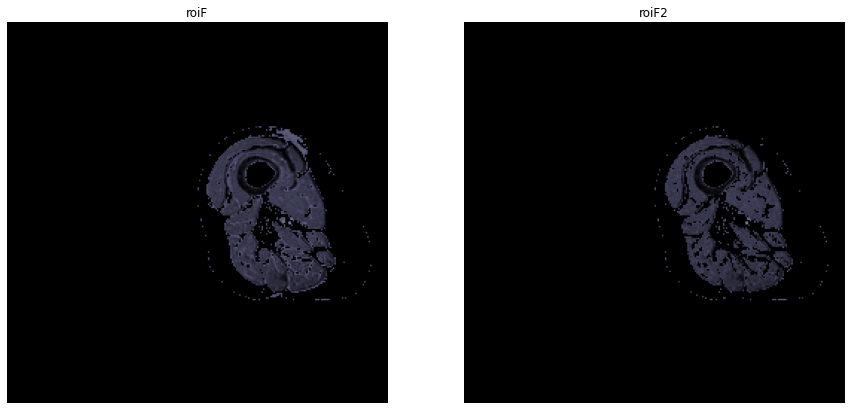

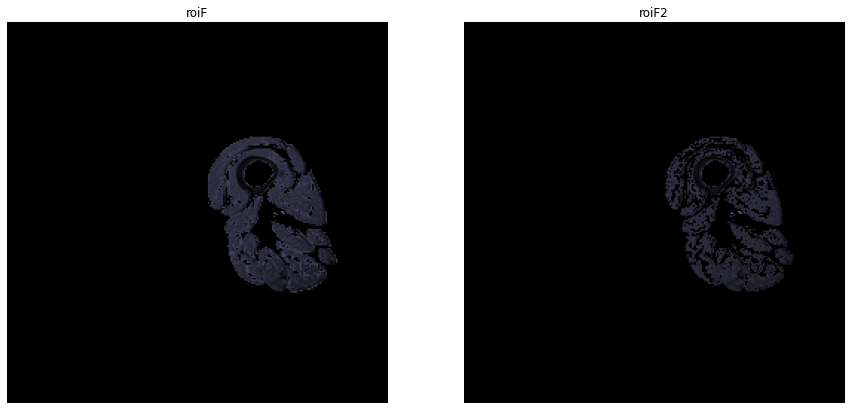

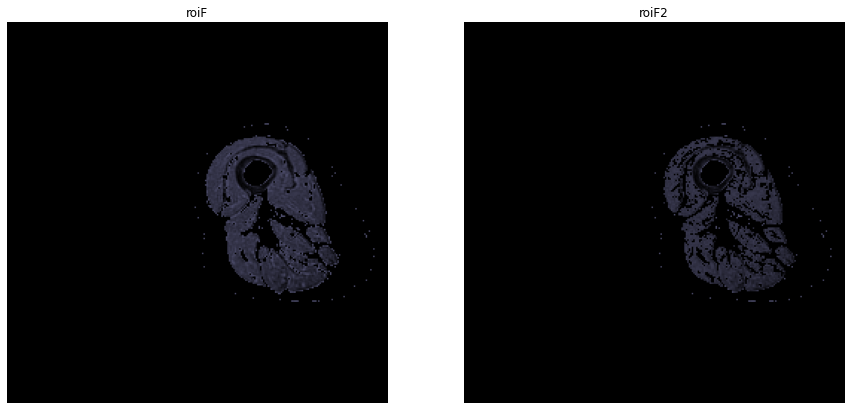

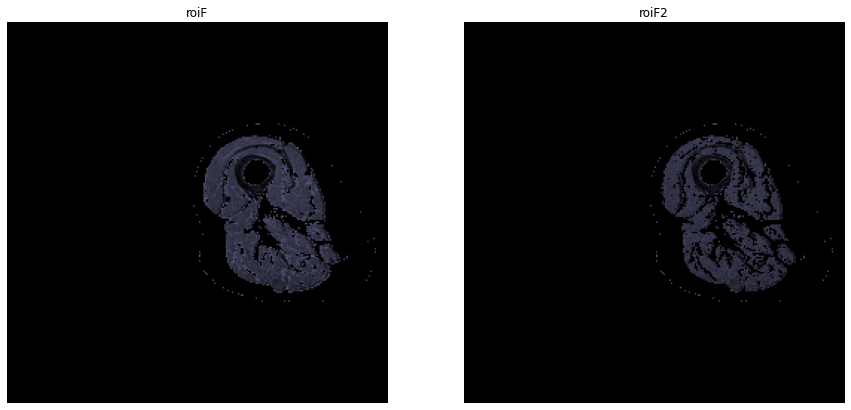

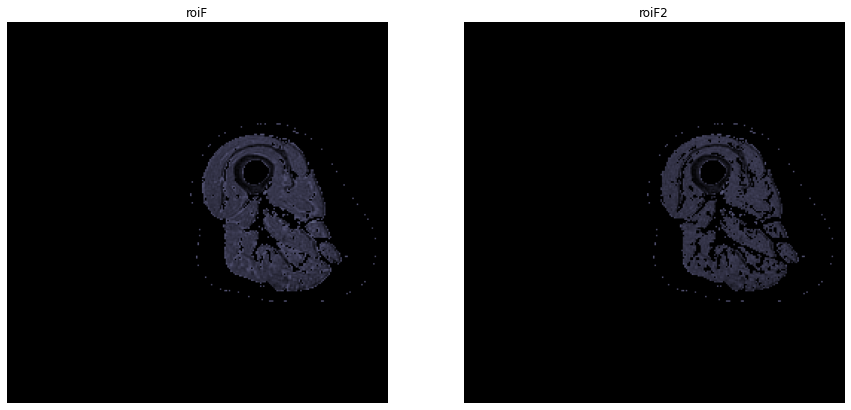

In [44]:
FINALArrayR2F=FINALArrayR2-fatseg1volR2

#Confirmation that the brighter MRI's are not due to misprocessing?
for i in range (5):
    fig, axs=plt.subplots (1,2, figsize=(15,10))
    axs[0].imshow(FINALArrayR2[i],"bone",vmin=0,vmax=255)
    axs[0].set_title(f"roiF")
    axs[0].axis("off")
    axs[1].imshow(FINALArrayR2F[i],"bone",vmin=0,vmax=255)
    axs[1].set_title(f"FINALArrayR2F")
    axs[1].axis("off")

In [ ]:
for i in range (1):
    fig, axs=plt.subplots (1,3, figsize=(15,10))
    axs[0].imshow(roi[i],"bone",)
    axs[0].set_title(f"ROI")
    axs[0].axis("off")
    axs[1].imshow(fatseg1vol[i],"bone")
    axs[1].set_title(f"ROI2")
    axs[1].axis("off")
    axs[2].imshow(fatseg1volR2[i],"bone")
    axs[2].set_title(f"ROIF")
    axs[2].axis("off")